# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Spring 2021
- Instructor: Vedang Patel
- Section: Tuesday/Thursday 9:35AM
- Student Name: Ryan Stuckey
- Student Email: stuckey.87@osu.edu
- Student ID: 500201211

Template Version V2.(Adopted from Prof. Tom Bihari's version)
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import texttable as tt
import hw1 


data = pd.read_csv("altered_seoulbokedata_train.csv", true_values=[
                    'Holiday', 'Yes'], false_values=['No Holiday', 'No'], parse_dates=True)
data['Date'] = data.astype({'Date': 'datetime64'})['Date']


***
# Section: 1 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class.
***

***
## Section: 1.1 - Describe the meaning and type of data for each attribute.
***

- Date (day/month/year)- date of recorded data point
- Rented Bike Count (# bikes)- number of bikes rented that hour
- Temperatue (°Celsius)- average temperature for that hour
- Humidity (%)- average percent humidty for that hour
- Wind Speed (meters/second)- average wind speed for that hour
- Visibility (10 meters)- average visibility for that hour
- Dew Point Temperatue (°Celsius)- average temperature at which dew formed that hour
- Solar Radiation (Megejoules/ square meter)- average energy emitted by sun in a square meter that hour
- Rainfall (millimeters)- amount of rain that fell that hour
- Snowfall (centimeters)- amount of snow that fell that hour
- Holiday (No Holiday/Holiday)- Holiday if a holiday occurred that day, else No Holiday
- Functioning Day (Yes/No)- Yes if the bike rental is running that day, else No
- IsItDay (True/False)- True if it was daytime (light outside) during that hour, else False

---
***
## Section: 1.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [2]:
hw1.print_section_1_2_stats(data)

---Basic Data Statistics---
Entries: 7358

--- Rented Bike Count ---
Mean: 708.626257135091
Std. Dev.: 649.7061658718347
Mode: 0
Median: 505.5
Min: 0
Max: 3556
10th Percentile:64.70000000000005
90th Percentile:1693.0

--- Temperature(C) ---
Mean: 12.825523240010872
Std. Dev.: 11.939273801245958
Mode: 19.1
Median: 13.5
Min: -17.8
Max: 39.4
10th Percentile:-3.7
90th Percentile:28.0

--- Humidity(%) ---
Mean: 58.36626800761076
Std. Dev.: 20.3533015908715
Mode: 97
Median: 57.0
Min: 0
Max: 98
10th Percentile:32.0
90th Percentile:86.0

--- Wind speed (m/s) ---
Mean: 1.7210519162815983
Std. Dev.: 1.0349255822234353
Mode: 1.1
Median: 1.5
Min: 0.0
Max: 7.4
10th Percentile:0.6
90th Percentile:3.2

--- Visibility (10m) ---
Mean: 1433.324408806741
Std. Dev.: 608.9114255669454
Mode: 2000
Median: 1690.0
Min: 27
Max: 2000
10th Percentile:434.70000000000005
90th Percentile:2000.0

--- Dew point temperature(C) ---
Mean: 4.088148953519979
Std. Dev.: 13.006531052469724
Mode: 0.0
Median: 5.05
Min: -30.6
M

---
***
## Section: 1.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

### Bike Rentals In Each Season
I chose this plot because it helps visualize the number of bikes sold in each season. While it does not help us pick out anything specific like outliers or dirty data, it does lead to a few different things:

1. Current season appears to play a heavy role in number of bikes rented out.
2. Winter is the least popular season for bike rentals, which is expected due to cold weather and snow.

However, these cannot yet be confirmed without further analysis. Further below, in Section 1.5, I focus more on how two attributes relate to each other.

Text(0.5, 1.0, 'Bikes Rented In Each Season')

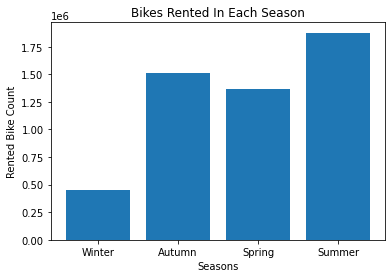

In [3]:
x, y = 'Seasons', 'Rented Bike Count'
d = hw1.sum_by_categories_to_dict(data, y, x)
plt.bar(x=[key for key in d.keys()], height=[key for key in d.values()])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bikes Rented In Each Season')

---
### Bike Rentals and Date
I chose this graph because I believe that the number of bikes rented will go hand in hand with what the current date is during a given year. I chose only to show data from 2018, as the data from 2017 does not cover a full year and the dates are not the same for each year, so summing the number of bikes rented from the same data on each year would distort the data. Additionally, plotting the data in this way will allow me to visualize some potentially incorrect data (i.e. erroneous values) or outliers, which is discussed more in the next section. The trend here is hard to see, as the data is spread all over, but after examining the graph one can see how the numbers of bikes increases up until the middle of the year and then slowly descreases. This trend will be more emphasized after I do some data cleaning in Section 2.

Text(0.5, 1.0, 'Bike Rentals vs. Date')

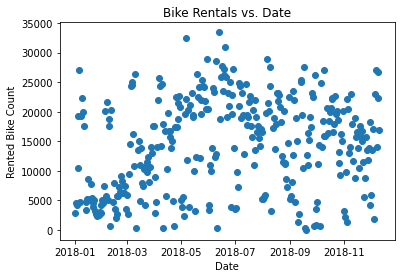

In [4]:
x, y = 'Date', 'Rented Bike Count'
d=hw1.sum_by_categories_to_dict(data, y, x) # sum number of bikes sold in each day
d=hw1.keep_keys(d, lambda timestamp, year : timestamp.year==year, 2018) # keep only keys from 2018
plt.scatter(x=[key for key in d.keys()], y=[val for val in d.values()])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bike Rentals vs. Date')

---
### Bike Rentals and Temperature
I chose to visualize this data because I believe that temperate will play the biggest role in the number of bikes rented in a given timespan. 

Text(0.5, 1.0, 'Bike Rentals vs. Temperature')

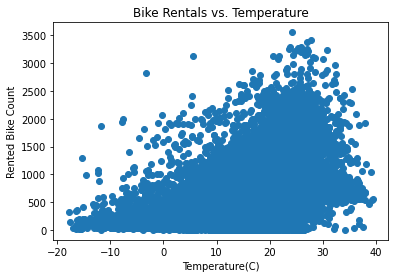

In [5]:
x, y = 'Temperature(C)', 'Rented Bike Count'
plt.scatter(x=data[x], y=data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bike Rentals vs. Temperature')

---
***
## Section: 1.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### General Process
To find the outliers for a given set of data, I:

1. Sort each piece into a dictionary, with the key being the date and the value being a list of outliers. 
2. Iterate over dictionary. For each list, find the outliers via my function hw1.find_outliers and then move this into another dictionary, with the key being the data and the value being the dictionary returned by **hw1.find_outliers**. Outlier function was built using the 1.5xIQR rule found [here on Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule).
3. Summarize results. Add up the total number of outliers, day with most/least outliers, etc.

---
### Outliers in Daily Temperature
First, I want to find outliers in daily temperatures. These outliers will mess with any prediction algorithms later and can be eliminated or changed to a reasonable value- like the mean- after we pick them out. 

I wanted to pick out outliers on each day instead of on the entire data set. Picking out outliers for each day individually means we are more likely to find outliers because the temperature over the course of a single day will not change that much relative to the temperature over the course of an entire year.

In [6]:
hw1.print_section_1_4_outliers(data, 'Temperature(C)', 'Date')

---Results---
Total Outliers: 270
Max Outliers In a Day: 8
Number of Days w/ Outliers: 180
Number Days Examined: 365


---
### Outliers in Number of Bikes Rented
Another important place to look for outliers is in the number of bikes rented. This is important, as this number is heavily dependent on data, season, and precipitation. 

I again picked out outliers on a day-by-day basis for bike rental count, as the number of bikes rented will have a wide range throughout the year depending on the season. While it 

In [8]:
hw1.print_section_1_4_outliers(data, 'Rented Bike Count', 'Date')

---Results---
Total Outliers: 249
Max Outliers In a Day: 4
Number of Days w/ Outliers: 153
Number Days Examined: 365


---
### Outliers in Rainfall and Snowfall
For outliers in rainfall and snowfall, I only wanted to consider the entries with non-zero values. This is because most entries have a value of 0, so including these would not allow me accurately identify all the outliers. As mentioned previosly, I am using the 1.5xIQR method to find outliers. This method classifies a number as an outlier if it lies outside a range determined by the first and third quartiles (or 25th and 75th percentiles). The first and third quartiles for the rainfall and snow fall are:

In [9]:
print("Rainfall 1st Quartile:", data['Rainfall(mm)'].quantile(0.25))
print("Rainfall 3rd Quartile:", data['Rainfall(mm)'].quantile(0.75))
print("Snowfall 1st Quartile:", data['Snowfall (cm)'].quantile(0.25))
print("Snowfall 3rd Quartile:", data['Snowfall (cm)'].quantile(0.75))

Rainfall 1st Quartile: 0.0
Rainfall 3rd Quartile: 0.0
Snowfall 1st Quartile: 0.0
Snowfall 3rd Quartile: 0.0


As seen, the quartiles are skewed by the large amount of zero-values. This results in every non-zero value being considered an outlier. By only including the non-zero values, our outliers become:

In [10]:
print("Rainfall 1st Quartile:", pd.Series([val for val in data['Rainfall(mm)'] if val != 0]).quantile(0.25))
print("Rainfall 3rd Quartile:", pd.Series([val for val in data['Rainfall(mm)'] if val != 0]).quantile(0.75))
print("Snowfall 1st Quartile:", pd.Series([val for val in data['Snowfall (cm)'] if val != 0]).quantile(0.25))
print("Snowfall 3rd Quartile:", pd.Series([val for val in data['Snowfall (cm)'] if val != 0]).quantile(0.75))

Rainfall 1st Quartile: 0.5
Rainfall 3rd Quartile: 2.5
Snowfall 1st Quartile: 0.5
Snowfall 3rd Quartile: 2.05


The outliers for the rainfall and snow fall can be sceen below. These outliers are based only on the non-zero values for rain and snowfall.

In [11]:
rain_outliers = hw1.find_outliers(pd.Series([val for val in data['Rainfall(mm)'] if val != 0]), hw1.is_outlier)
snow_outliers = hw1.find_outliers(pd.Series([val for val in data['Snowfall (cm)'] if val != 0]), hw1.is_outlier)

print("---Rainfall Outliers---")
print("Averag Non-zero Rainfall:", rain_outliers['Mean'])
print("Number of outliers:", rain_outliers['Outliers Count'])
print("Min Outlier:", rain_outliers['Min Outlier'])
print("Max Outlier:", rain_outliers['Max Outlier'])
print("Avg. Outlier:", rain_outliers['Avg. Outlier'])
print()

print("---Snowfall Outliers---")
print("Average Non-zero Snowfall:", snow_outliers['Mean'])
print("Number of outliers:", snow_outliers['Outliers Count'])
print("Min Outlier:", snow_outliers['Min Outlier'])
print("Max Outlier:", snow_outliers['Max Outlier'])
print("Avg. Outlier:", snow_outliers['Avg. Outlier'])


---Rainfall Outliers---
Averag Non-zero Rainfall: 2.3075688073394494
Number of outliers: 40
Min Outlier: 6.0
Max Outlier: 35.0
Avg. Outlier: 11.4925

---Snowfall Outliers---
Average Non-zero Snowfall: 1.4216
Number of outliers: 9
Min Outlier: 4.8
Max Outlier: 8.8
Avg. Outlier: 6.377777777777777


---
***
## Section: 1.5 - Explore the relationships among the attributes, excluding the class attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

### Comparing Time of Year and Number of Bike Rentals
As discussed in Section 1.3, I think the time of the year will be one of the key factors in determing how many bikes will be rented out. Two attributes can be used to get time of the year- the date and the season. I will remove outliers for the number of rented bikes and then re-analyze the data. To analyze the relationship between date and bike rentals, I have created a correlation matrix and a scatter plot to visualize the data.

In [48]:
x, y = 'Date', 'Rented Bike Count'
bikes_rented_date = hw1.sort_by_categories_to_dict(data, y, x)
outliers_removed = 0
for date in bikes_rented_date:
    bikes_rented_date[date] = [val for val in hw1.remove_outliers(pd.Series(bikes_rented_date[date]), hw1.is_outlier)[0]]
    bikes_rented_date[date] = sum(bikes_rented_date[date])
date_series, bike_series = pd.Series(data=[day.day_of_year for day in bikes_rented_date.keys()], name=x),pd.Series(data=bikes_rented_date.values(), name=y)
df = pd.DataFrame(data={date_series.name:date_series, bike_series.name:bike_series})
corr = df.corr()
table = tt.Texttable()
table.add_rows([['', x], [y, corr[y][x]]])
print(table.draw())

+-------------------+-------+
|                   | Date  |
+===================+=======+
| Rented Bike Count | 0.080 |
+-------------------+-------+


#### Problems with Dates and Correlation
After building the correlation matrix, I realized that the correlation of the date vs. the bike rentals will not be a good representation, as the peak of bike rentals will likely be during the middle of the year. So even though the bike rentals do depend on the data, the correlation matrix does not reflect this. The relationship between the date and the number of bikes rented can be better seen with the scatter plot below:

Text(0, 0.5, 'Rented Bike Count')

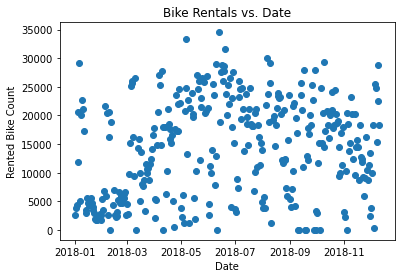

In [25]:
bikes_rented_date_without_2018 = hw1.keep_keys(bikes_rented_date, lambda timestamp, year : timestamp.year == year, 2018)
plt.scatter(x=[x for x in bikes_rented_date_without_2018.keys()], y=[y for y in bikes_rented_date_without_2018.values()])
plt.title('Bike Rentals vs. Date')
plt.xlabel(x)
plt.ylabel(y)

---
### Analyzing the Weather and Bike Rentals

Precipitation and the number of bike rentals should be easier to analyze, as one would expect a negative correlation between the amount of precipitation and number of bikes rented. Additionally, one could anticipate a positive correlation between the temperature and the number of bike rentals, as people are more likely to rent a bike if it is warm outisde. To start off, I will create a correlation matrix between the snowfall, rainfall, temperature and number of bikes rented.

In [45]:
y, x1, x2, x3 = 'Rented Bike Count', 'Rainfall(mm)', 'Snowfall (cm)', 'Temperature(C)'
df_precip_bikes = pd.DataFrame(data = {y:data[y], x1:data[x1], x2:data[x2], x3:data[x3]})
corr = df_precip_bikes.corr()
table = tt.Texttable()
table.add_rows([['', x1, x2, x3], [y, corr[y][x1], corr[y][x2], corr[y][x3]]])
print(table.draw())

+-------------------+--------------+---------------+----------------+
|                   | Rainfall(mm) | Snowfall (cm) | Temperature(C) |
+===================+==============+===============+================+
| Rented Bike Count | -0.115       | -0.136        | 0.507          |
+-------------------+--------------+---------------+----------------+


#### Analysis
As expected, a correlation exists between rented bike count and rainfall, snowfall, and temperature. Between precipitation and bike rentals, a negative correlation exists, meaning as precipitation increases, bike rentals decrease. And, between temperature and bike rentals, a strong positive correlation exists, meaning bike rentals increase as temperature increase.

These findings are significant because it means we might be able to use them when developing our final data model in Section 2. If we know that rainfall, snowfall, and temperatue affect the number of bikes rented, those are attributes we will want to retain in our final data model.

Looking at the graphs for each of these reveals the same information. In each graph, we can see how the correlation holds.

In [50]:
plt.scatter(x=data[x1], y=data[y])
plt.xlabel(x1)
plt.ylabel(y)
plt.title(str(y + ' vs. ' + x1))

SyntaxError: unexpected EOF while parsing (<ipython-input-50-a5a95c519bef>, line 4)

***
## Section: 1.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier visualizations or create new ones.
***

***
# Section: 2 - Data Processing
- Based on the insights gleaned in the data understanding phase, determine what type of processing that you would like to do to create a final dataset to be used for future modeling.
- One of the final outputs of your program should be the creation of a dataset (can be in the format of a Python data frame) which has all of the attributes you would like to use for the modeling phase of a project, as well as dealing with any outliers, noise or missing values.
***

***
## Section: 2.1 - What attributes do you decide to keep or remove? Please justify.
***

***
## Section: 2.2 - Did you decide to implement any attribute transformations? If so, why?
***

***
## Section: 2.3 - Did you decide to create any new features? If so, why?
***

***
## Section: 2.4 - Implement any data cleaning steps previously identified.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

***
# Section: 3 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? Identify and explain any interesting relationships between the class attribute and the other attributes. You may refer to earlier visualizations or create new ones.?
***